<a href="https://colab.research.google.com/github/PranavJagannathan/deep-learning/blob/main/Augmented_reality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING THE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt

IMPORTING THE MNIST DATA SET

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

SPLITTING IT INTO TEST AND TRAIN DATA SET
Details of the Loaded Data:
train_images: A NumPy array of shape (60000, 28, 28) containing 60,000 training images. Each image is a 28x28 pixel grayscale image of a handwritten digit.
train_labels: A NumPy array of shape (60000,) containing the labels (digits 0-9) corresponding to the training images.
test_images: A NumPy array of shape (10000, 28, 28) containing 10,000 test images, similar to the training images.
test_labels: A NumPy array of shape (10000,) containing the labels corresponding to the test images.

In [ ]:
(train_images,train_labels),(test_images, test_labels)= mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


DATA PREPROCESSING- (COLOR RANGE, RESHAPING, HOT ENCODING)

In [ ]:
# Changing color range of the images from 0-255 to 0-1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshaping the image from 28x28 to 28x28x1 where 1 denotes that every image is grayscale
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert labels into a special format where each digit is represented by a list of ten numbers.
# Only one of these ten numbers is '1' (the correct digit), and the rest are '0'.
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [ ]:
# Initialize the model
model = Sequential()

# Add layers to the model
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

COMPILE THE MODEL[preparing it for training]

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

TRAIN THE MODEL

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split=0.1, verbose=1)

Epoch 1/10
422/422 [==============================] - 6s 7ms/step - loss: 0.3940 - accuracy: 0.8763 - val_loss: 0.0692 - val_accuracy: 0.9787
Epoch 2/10
422/422 [==============================] - 3s 7ms/step - loss: 0.1283 - accuracy: 0.9619 - val_loss: 0.0490 - val_accuracy: 0.9853
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0961 - accuracy: 0.9713 - val_loss: 0.0412 - val_accuracy: 0.9877
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0791 - accuracy: 0.9763 - val_loss: 0.0348 - val_accuracy: 0.9895
Epoch 5/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0712 - accuracy: 0.9788 - val_loss: 0.0314 - val_accuracy: 0.9907
Epoch 6/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0639 - accuracy: 0.9807 - val_loss: 0.0361 - val_accuracy: 0.9892
Epoch 7/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0594 - accuracy: 0.9821 - val_loss: 0.0342 - val_accuracy: 0.9905
Epoch 

EVALUATE THE MODEL

In [ ]:
test_loss, test_accuracy= model.evaluate(test_images,test_labels,verbose=0)
print(f'Test accuracy:{test_accuracy:.4f}')

Test accuracy:0.9927


PLOTTING THE MODEL ACCURACY AND MODEL LOSS


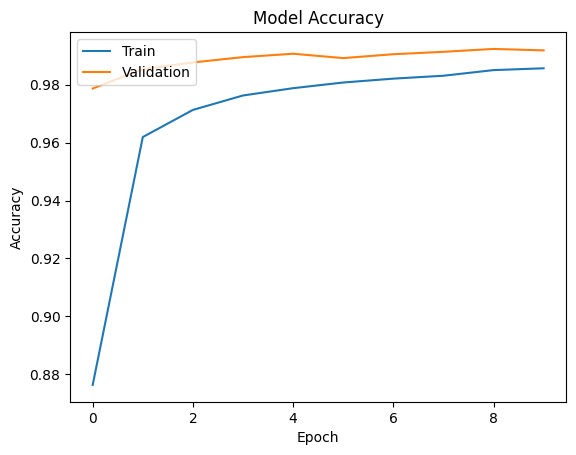

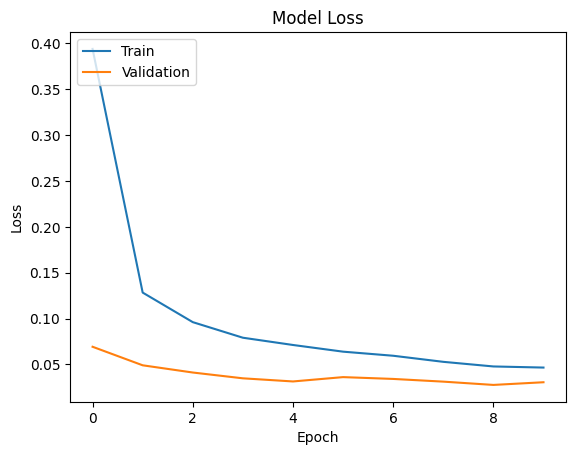

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

FURTHER EVALUATING THE MODEL AND INTERPRETATION

313/313 [==============================] - 1s 2ms/step


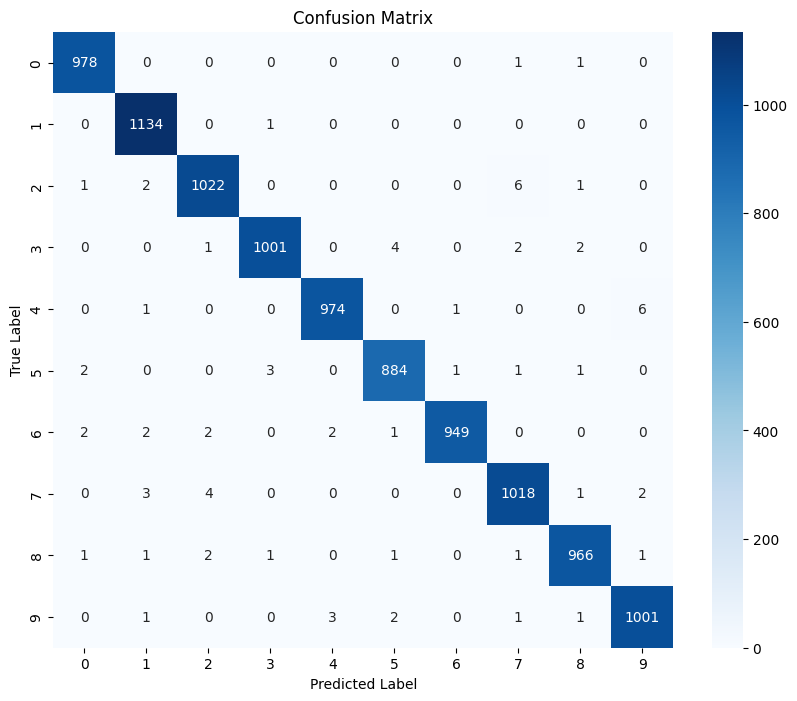

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

# Assuming you have your true labels and predicted labels
y_true = np.argmax(test_labels, axis=1)
y_pred_probs = model.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
plt.savefig('my_graph.png')
# Download the image file
files.download('my_graph.png')


# Classification Report
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

HYPERTUNING AND MODEL OPTIMIZATION

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 24.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fou

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from kerastuner import HyperModel, RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Example hyperparameters
input_shape = (28, 28, 1)
num_classes = 10

# Define the model building function
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
        model.add(Flatten())
        model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
        model.add(Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model

hypermodel = MyHyperModel()

# Perform random search for hyperparameters
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=7,  # Number of hyperparameter combinations to try
    directory='random_search',  # Directory to save the search results
    project_name='mnist_random_search'  # Name for the project
)

# Perform the hyperparameter search
tuner.search(train_images, train_labels,
             epochs=10,
             validation_data=(test_images, test_labels))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters found: {best_hps}")

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

Trial 7 Complete [00h 19m 26s]
val_accuracy: 0.9900000095367432

Best val_accuracy So Far: 0.991100013256073
Total elapsed time: 01h 55m 25s
Best hyperparameters found: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7e39d8b877f0>


EVALUATING THE FINAL TUNED MODEL

In [ ]:
# Assuming 'model' is your tuned and trained Keras model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

313/313 [==============================] - 3s 9ms/step - loss: 0.0210 - accuracy: 0.9929
Test Accuracy: 0.992900013923645
Test Loss: 0.021047208458185196


Visualization of Accuracy and Loss

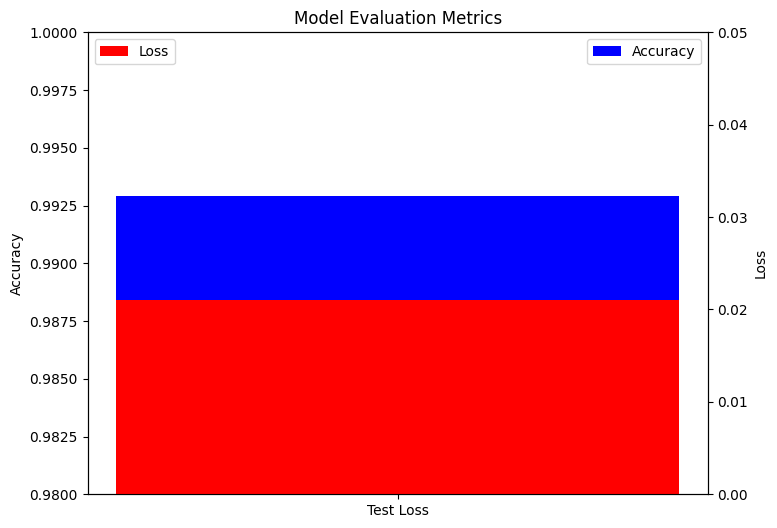

In [ ]:
import matplotlib.pyplot as plt

# Test accuracy and loss
test_accuracy = 0.9929
test_loss = 0.0210

# Create bar plots for accuracy and loss
fig, ax = plt.subplots(figsize=(8, 6))

# Accuracy bar plot
ax.bar(["Test Accuracy"], [test_accuracy], color='blue', label='Accuracy')
ax.set_ylim([0.98, 1.0])  # Set ylim for better visualization
ax.set_ylabel('Accuracy')
ax.set_title('Model Evaluation Metrics')
ax.legend(loc='upper right')

# Loss bar plot
ax2 = ax.twinx()
ax2.bar(["Test Loss"], [test_loss], color='red', label='Loss')
ax2.set_ylim([0, 0.05])  # Set ylim for better visualization
ax2.set_ylabel('Loss')
ax2.legend(loc='upper left')

plt.show()


 Visualization of Precision, Recall, and F1-Score

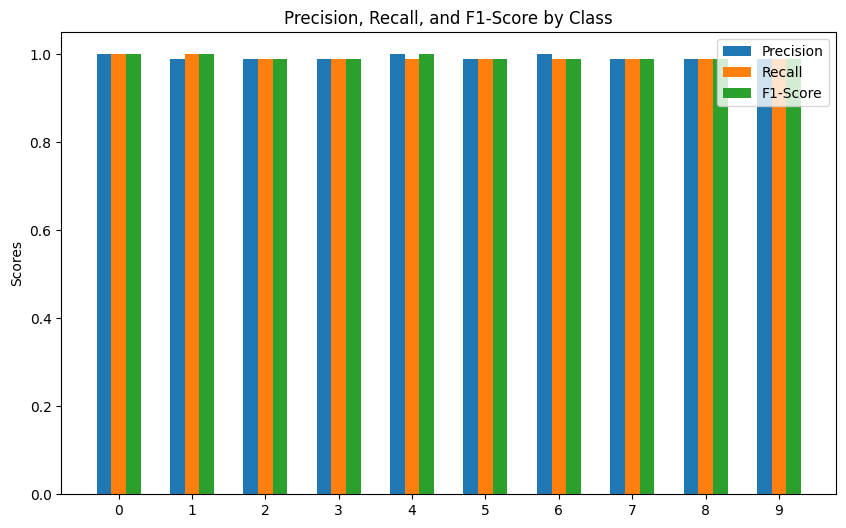

In [ ]:
import numpy as np

# Define precision, recall, and F1-score values (example)
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
precision = [1.00, 0.99, 0.99, 0.99, 1.00, 0.99, 1.00, 0.99, 0.99, 0.99]
recall = [1.00, 1.00, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99]
f1_score = [1.00, 1.00, 0.99, 0.99, 1.00, 0.99, 0.99, 0.99, 0.99, 0.99]

x = np.arange(len(classes))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.show()

Tabular Representation

In [ ]:
import pandas as pd

# Create a DataFrame for precision, recall, and F1-score
metrics_data = {
    'Class': classes,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

  Class  Precision  Recall  F1-Score
0     0       1.00    1.00      1.00
1     1       0.99    1.00      1.00
2     2       0.99    0.99      0.99
3     3       0.99    0.99      0.99
4     4       1.00    0.99      1.00
5     5       0.99    0.99      0.99
6     6       1.00    0.99      0.99
7     7       0.99    0.99      0.99
8     8       0.99    0.99      0.99
9     9       0.99    0.99      0.99
